<a href="https://colab.research.google.com/github/juanruiz23/Machine_Learning/blob/main/Proyecto_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto 5

*   Gonzalez Yibby
*   Morales Katalina
*   Ruiz Sebastian 



In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
import bokeh
import plotly as px

In [ ]:
import numpy as np
import pandas as pd
data_desocupados = pd.read_excel("/content/Desocupados.xlsx")
data_ocupados = pd.read_excel("/content/Ocupados.xlsx")
data_inactivos = pd.read_excel("/content/Inactivos.xlsx")
data_fuerza_t = pd.read_excel("/content/Fuerza de trabajo.xlsx")
data_caracteristicas = pd.read_excel("/content/Caracteristicas generales (Personas).xlsx")

In [ ]:
del data_desocupados['FEX_C']
del data_ocupados['FEX_C']
del data_inactivos['FEX_C']
del data_fuerza_t['FEX_C']
del data_caracteristicas['FEX_C']

In [ ]:
del data_fuerza_t['P6240S1']
del data_fuerza_t['P6310S1']
del data_fuerza_t['P6290S1']


In [ ]:
del data_desocupados['AREA']
del data_inactivos['AREA']
del data_fuerza_t['AREA']
del data_ocupados['AREA']
del data_caracteristicas['AREA']

In [ ]:
del data_ocupados['REGIS']
del data_desocupados['REGIS']
del data_inactivos['REGIS']
del data_fuerza_t['REGIS']
del data_caracteristicas['REGIS']

In [ ]:
del data_desocupados['DSI']
del data_inactivos['INI']
del data_fuerza_t['FT']
del data_ocupados['OCI']

In [ ]:
data_ocupados.insert(4,"Estado","Ocupados")
data_desocupados.insert(4,"Estado","Desocupado")
data_inactivos.insert(4,"Estado","Inactivos")

# Duplicados

In [ ]:
data_desocupados = data_desocupados.drop_duplicates()

In [ ]:
data_ocupados = data_ocupados.drop_duplicates()

In [ ]:
data_inactivos = data_inactivos.drop_duplicates()

In [ ]:
data_fuerza_t = data_fuerza_t.drop_duplicates()

In [ ]:
data_caracteristicas = data_caracteristicas.drop_duplicates()

In [ ]:
data_desocupados.shape

(3498, 6)

In [ ]:
data_ocupados.shape

(14119, 18)

In [ ]:
data_inactivos.shape

(12385, 6)

In [ ]:
data_fuerza_t.shape

(30002, 19)

In [ ]:
data_caracteristicas.shape

(38080, 7)

# Prueba para ver si esta bien merge

In [ ]:
left = pd.DataFrame({'key1':[2,3,1,8,7,6,4,5],
                     'Area':[99,98,97,95,85,81,90,89],
                     'A':['A0','A1','A2','A3','A4','A5','A6','A7'],
                     'B':['B0','B1','B2','B3','B4','B5','B6','B7']})

right = pd.DataFrame({'key1':[2,3,8,4,5],
                      'Area':[99,98,95,90,89],
                      'Estado':['a','a','a','a','a'],
                     'C':['C0','C1','C2','C3','C4'],
                     'D':['D0','D1','D2','D3','D4']})

right2 = pd.DataFrame({'key1':[1,7,6],
                      'Area':[97,85,81],
                      'Estado':['b','b','b'],
                     'F':['F0','F1','F2'],
                     'H':['H0','H1','H2']})

In [ ]:
left

,key1,Area,A,B
0,2,99,A0,B0
1,3,98,A1,B1
2,1,97,A2,B2
3,8,95,A3,B3
4,7,85,A4,B4
5,6,81,A5,B5
6,4,90,A6,B6
7,5,89,A7,B7


In [ ]:
right

,key1,Area,Estado,C,D
0,2,99,a,C0,D0
1,3,98,a,C1,D1
2,8,95,a,C2,D2
3,4,90,a,C3,D3
4,5,89,a,C4,D4


In [ ]:
right2

,key1,Area,Estado,F,H
0,1,97,b,F0,H0
1,7,85,b,F1,H1
2,6,81,b,F2,H2


In [ ]:
#ESTADOS
pd.merge(right2, right, how  = 'outer')

,key1,Area,Estado,F,H,C,D
0,1,97,b,F0,H0,NaN,NaN
1,7,85,b,F1,H1,NaN,NaN
2,6,81,b,F2,H2,NaN,NaN
3,2,99,a,NaN,NaN,C0,D0
4,3,98,a,NaN,NaN,C1,D1
5,8,95,a,NaN,NaN,C2,D2
6,4,90,a,NaN,NaN,C3,D3
7,5,89,a,NaN,NaN,C4,D4


# Retomando


In [ ]:
dt2 = pd.concat([data_ocupados, data_desocupados,data_inactivos])

In [ ]:
dt1 = pd.merge(data_caracteristicas,data_fuerza_t,on = ['DIRECTORIO','SECUENCIA_P','ORDEN','HOGAR','DPTO'],how  = 'outer')

In [ ]:
dt1

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,P6020,P6040,DPTO,P6230,P6240,P6250,P6260,P6270,P6280,P6290,P6300,P6310,P6320,P6330,P6340,P6350,P6351
0,2187,1,1,1,2,0,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2187,1,2,1,2,0,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2187,1,3,1,2,47,97,3.0,4.0,2,2,2,2,,1,4,1,2,,,
3,2187,1,4,1,1,5,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2187,1,5,1,1,16,97,5.0,4.0,2,2,2,2,,2,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38075,5328146,1,2,1,2,55,86,2.0,4.0,2,2,2,2,,2,,,,,,
38076,5328146,1,3,1,1,3,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38077,5328225,1,1,1,2,41,86,1.0,2.0,2,2,2,1,1,,,,,,,1
38078,5328225,1,2,1,2,16,86,1.0,1.0,,,,,,,,,,,,


In [ ]:
Base = pd.merge(dt1,dt2,how  = 'outer')

In [ ]:
Base

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,P6020,P6040,DPTO,P6230,P6240,P6250,P6260,P6270,P6280,P6290,P6300,P6310,P6320,P6330,P6340,P6350,P6351,Estado,P6430S1,P6500,P6750,P6760,P6800,P6850,P6830,P6830S1,P6430,RAMA4D_R4,OFICIO,RAMA2D_R4
0,2187,1,1,1,2,0,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2187,1,2,1,2,0,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2187,1,3,1,2,47,97,3.0,4.0,2,2,2,2,,1,4,1,2,,,,Inactivos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2187,1,4,1,1,5,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2187,1,5,1,1,16,97,5.0,4.0,2,2,2,2,,2,,,,,,,Inactivos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38075,5328146,1,2,1,2,55,86,2.0,4.0,2,2,2,2,,2,,,,,,,Inactivos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38076,5328146,1,3,1,1,3,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38077,5328225,1,1,1,2,41,86,1.0,2.0,2,2,2,1,1,,,,,,,1,Desocupado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38078,5328225,1,2,1,2,16,86,1.0,1.0,,,,,,,,,,,,,Ocupados,,400000,,,24.0,24.0,,,1.0,4771.0,45.0,47.0


In [ ]:
Base['ORDEN'] == Base['P6230']

0        False
1        False
2         True
3        False
4         True
         ...  
38075     True
38076    False
38077     True
38078    False
38079    False
Length: 38080, dtype: bool

In [ ]:
Base

,DIRECTORIO,SECUENCIA_P,ORDEN,HOGAR,P6020,P6040,DPTO,P6230,P6240,P6250,P6260,P6270,P6280,P6290,P6300,P6310,P6320,P6330,P6340,P6350,P6351,Estado,P6430S1,P6500,P6750,P6760,P6800,P6850,P6830,P6830S1,P6430,RAMA4D_R4,OFICIO,RAMA2D_R4
0,2187,1,1,1,2,0,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2187,1,2,1,2,0,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2187,1,3,1,2,47,97,3.0,4.0,2,2,2,2,,1,4,1,2,,,,Inactivos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2187,1,4,1,1,5,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2187,1,5,1,1,16,97,5.0,4.0,2,2,2,2,,2,,,,,,,Inactivos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38075,5328146,1,2,1,2,55,86,2.0,4.0,2,2,2,2,,2,,,,,,,Inactivos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38076,5328146,1,3,1,1,3,86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38077,5328225,1,1,1,2,41,86,1.0,2.0,2,2,2,1,1,,,,,,,1,Desocupado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38078,5328225,1,2,1,2,16,86,1.0,1.0,,,,,,,,,,,,,Ocupados,,400000,,,24.0,24.0,,,1.0,4771.0,45.0,47.0


REGION  ORINOQUIA
Arauca, Casanare y Vichada. 
REGION AMAZONIA
Amazonas, Putumayo, Guainía, Guaviare y Vaupés.
DPTO
81 Arauca (Arauca)
85 Casanare (Yopal)
86 Putumayo (Mocoa)
91 Amazonas (Leticia)
94 Guainía (Inírida)
95 Guaviare (San José del Guaviare)
97 Vaupés (Mitú)
99 Vichada (Puerto Carreño)



SEXOS

In [ ]:
masculino = Base.loc[:, 'P6020'] == 1

In [ ]:
Base.columns

Index(['DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'HOGAR', 'P6020', 'P6040', 'DPTO',
       'P6230', 'P6240', 'P6250', 'P6260', 'P6270', 'P6280', 'P6290', 'P6300',
       'P6310', 'P6320', 'P6330', 'P6340', 'P6350', 'P6351', 'Estado',
       'P6430S1', 'P6500', 'P6750', 'P6760', 'P6800', 'P6850', 'P6830',
       'P6830S1', 'P6430', 'RAMA4D_R4', 'OFICIO', 'RAMA2D_R4'],
      dtype='object')

In [ ]:
df_masculino = Base.loc[masculino]

In [ ]:
femenino = Base.loc[:, 'P6020'] == 2

In [ ]:
df_femenino = Base.loc[femenino]


DEPARTAMENTOS


In [ ]:
#ARAUCA
arauca = Base.loc[:, 'DPTO'] == 81
df_arauca = Base.loc[arauca] # De los individuos escuestados, Hay 5230 personas en Arauca

In [ ]:
#CASANARE
casanare = Base.loc[:, 'DPTO'] == 85
df_casanare = Base.loc[casanare] # De los individuos escuestados, Hay 5735 personas en Casanare

In [ ]:
#VICHADA
vichada = Base.loc[:, 'DPTO'] == 99
df_vichada = Base.loc[vichada] # De los individuos escuestados, Hay 3668 personas en Vichada

Text(0, 0.5, 'Frecuencia')

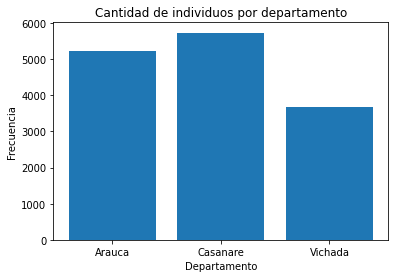

In [ ]:
dep = ["Arauca", "Casanare", "Vichada"]
data = [5230, 5735, 3668]
plt.bar(dep, data)
plt.title("Cantidad de individuos por departamento")
plt.xlabel("Departamento")
plt.ylabel("Frecuencia")

De los encuestados, hay 18433 hombree en la region de Orinoquia y Amezanonia y 19647 mujeres.


In [ ]:
18433 + 19647

38080

Text(0, 0.5, 'Frecuencia')

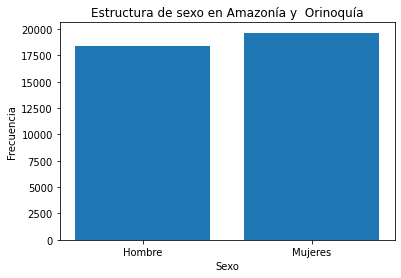

In [ ]:
Sexo = ["Hombre", "Mujeres"]
Freq = [18433, 19647]
plt.bar(Sexo, Freq)
plt.title("Estructura de sexo en Amazonía y  Orinoquía")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")


¿Cuantos hombres y mujeres hay en el departamento de Arauca?

In [ ]:
a = df_masculino.iloc[:,[4,6]] 
arauca_1 = a.loc[:, 'DPTO'] == 81
df_arauca1 = a.loc[arauca_1]

In [ ]:
df_arauca1

,P6020,DPTO
454,1,81
457,1,81
458,1,81
459,1,81
464,1,81
...,...,...
38020,1,81
38046,1,81
38049,1,81
38052,1,81


Text(0, 0.5, 'Frecuencia')

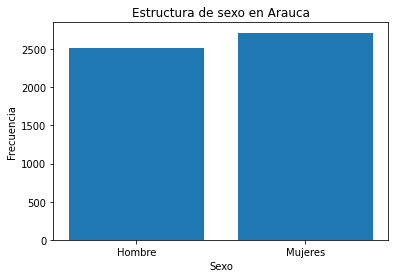

In [ ]:
Sexo = ["Hombre", "Mujeres"]
Freq = [2515, 2716]
plt.bar(Sexo, Freq)
plt.title("Estructura de sexo en Arauca")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")

De los encuestados en el departamento de Arauca, 2514 son Hombres y 2716 son Mujeres.

In [ ]:
5230-2514 

2716

In [ ]:
2514 + 2716

5230

¿Cuantos hombres y mujeres hay en el departamento de Casanare?

In [ ]:
casanare_1 = a.loc[:, 'DPTO'] == 85
df_casanare1 = a.loc[casanare_1]
df_casanare1

,P6020,DPTO
176,1,85
212,1,85
213,1,85
217,1,85
228,1,85
...,...,...
37849,1,85
37850,1,85
37851,1,85
37853,1,85


Text(0, 0.5, 'Frecuencia')

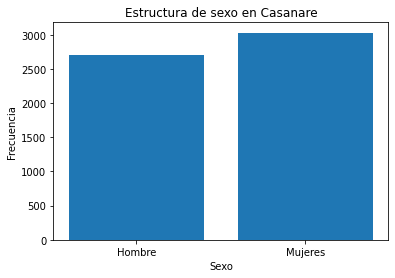

In [ ]:
Sexo = ["Hombre", "Mujeres"]
Freq = [2706, 3029]
plt.bar(Sexo, Freq)
plt.title("Estructura de sexo en Casanare")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")

De los encuestados en el departamento de Casanare, 2706 son hombres y 3029 son mujeres.

In [ ]:
5735-2706 

3029

In [ ]:
2706  + 3029

5735

¿Cuantos hombres y mujeres hay en el departamento de Vichada?

In [ ]:
vichada_1 = a.loc[:, 'DPTO'] == 99
df_vichada1 = a.loc[vichada_1]
df_vichada1

,P6020,DPTO
6,1,99
12,1,99
31,1,99
34,1,99
39,1,99
...,...,...
37771,1,99
37774,1,99
37775,1,99
37778,1,99


Text(0, 0.5, 'Frecuencia')

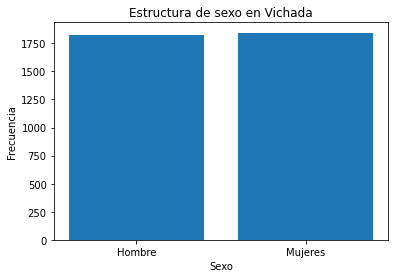

In [ ]:
Sexo = ["Hombre", "Mujeres"]
Freq = [1823, 1845]
plt.bar(Sexo, Freq)
plt.title("Estructura de sexo en Vichada")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")

De los encuestados en el departamento de Vichada, 1823 son hombres y 1845 son mujeres.

In [ ]:
3668 - 1823

1845

In [ ]:
1823 + 1845

3668

In [ ]:
5230 + 5735 + 3668

14633

¿CUANTOS HOMBRES HAY EN LA REGION ORINOQUIA?

In [ ]:
2514 + 2706 + 1823

7043

¿CUANTOS MUJERES HAY EN LA REGION ORINOQUIA?

In [ ]:
2716+ 3029 + 1845

7590

¿CUANTAS PERSONAS HAY EN LA REGION ORINOQUIA?

In [ ]:
7043 + 7590

14633

Text(0, 0.5, 'Frecuencia')

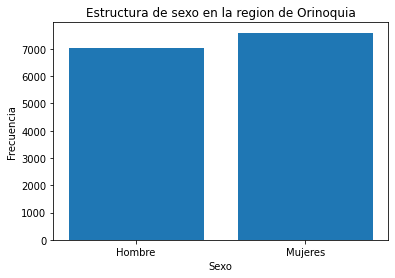

In [ ]:
Sexo = ["Hombre", "Mujeres"]
Freq = [7043, 7590]
plt.bar(Sexo, Freq)
plt.title("Estructura de sexo en la region de Orinoquia")
plt.xlabel("Sexo")
plt.ylabel("Frecuencia")

¿CUANTOS HOMBRES Y MUJERES ESTAN OCUPADOS, DESOCUPADOS E INACTIVOS EN ARAUCA?

Hay 838 hombres ocupados y 703 mujeres ocupadas.
Total de ocupados = 1541

Hay 394 hombres desocupados y 325 mujeres desocupadas.
Total de ocupados = 719

Hay 714 hombres inactivos y 1202 mujeres inactivas.
Total de ocupados = 1916

Text(0.5, 1.0, 'Estado de trabajo segun sexo en Arauca')

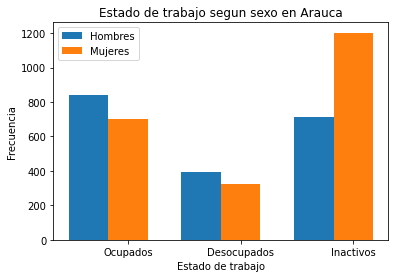

In [ ]:
Hombres = [838, 394, 714]
Mujeres = [703, 325, 1202]
 
 
numero_de_grupos = len(Hombres)
indice_barras = np.arange(numero_de_grupos)
ancho_barras = 0.35
 
plt.bar(indice_barras, Hombres, width=ancho_barras, label='Hombres')
plt.bar(indice_barras + ancho_barras, Mujeres, width=ancho_barras, label='Mujeres')
plt.legend(loc='best')

plt.xticks(indice_barras + ancho_barras, ("Ocupados", "Desocupados","Inactivos"))
 
plt.ylabel('Frecuencia')
plt.xlabel('Estado de trabajo')
plt.title('Estado de trabajo segun sexo en Arauca')


In [ ]:
indice_barras

array([0, 1, 2, 3, 4])

In [ ]:
1541 + 719 + 1916

4176

In [ ]:
5230 - 4176 #NA

1054

In [ ]:
# c = hombres
c = df_masculino.iloc[:,[4,6,21]] 
arauca_2 = c.loc[:, 'DPTO'] == 81
df_arauca2 = c.loc[arauca_2]
sum(df_arauca2['Estado'] == 'Ocupados')


838

In [ ]:
sum(df_arauca2['Estado'] == 'Desocupado')

394

In [ ]:
sum(df_arauca2['Estado'] == 'Inactivos')

714

In [ ]:
#  d = mujeres
d = df_femenino.iloc[:,[4,6,21]] 
arauca_3 = d.loc[:, 'DPTO'] == 81
df_arauca3 = d.loc[arauca_3]
sum(df_arauca3['Estado'] == 'Ocupados')

703

In [ ]:
sum(df_arauca3['Estado'] == 'Desocupado')

325

In [ ]:
sum(df_arauca3['Estado'] == 'Inactivos')

1202

¿CUANTOS HOMBRES Y MUJERES ESTAN OCUPADOS EN CASANARE?

Hay 1343 hombres ocupados y 1239 mujeres ocupadas.
Total de ocupados = 2582

Hay 201 hombres desocupados y 206 mujeres desocupadas.
Total de desocupados = 407

Hay 601 hombres inactivos y 1025 mujeres inactivas.
Total de inactivos = 1626

In [ ]:
2582 + 407 + 1626

4615

In [ ]:
5735 - 4615 #NA

1120

In [ ]:
casanare_2 = c.loc[:, 'DPTO'] == 85
df_casanare2 = c.loc[casanare_2]
sum(df_casanare2['Estado'] == 'Ocupados')


1343

In [ ]:
sum(df_casanare2['Estado'] == 'Desocupado')

201

In [ ]:
sum(df_casanare2['Estado'] == 'Inactivos')

601

In [ ]:
casanare_3 = d.loc[:, 'DPTO'] == 85
df_casanare3 = d.loc[casanare_3]
sum(df_casanare3['Estado'] == 'Ocupados')

1239

In [ ]:
sum(df_casanare3['Estado'] == 'Desocupado')

206

In [ ]:
sum(df_casanare3['Estado'] == 'Inactivos')

1025

Text(0.5, 1.0, 'Estado de trabajo segun sexo en Casanare')

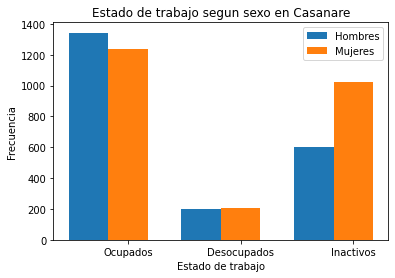

In [ ]:
Hombres = [1343, 201, 601]
Mujeres = [1239, 206, 1025]
 
 
numero_de_grupos = len(Hombres)
indice_barras = np.arange(numero_de_grupos)
ancho_barras = 0.35
 
plt.bar(indice_barras, Hombres, width=ancho_barras, label='Hombres')
plt.bar(indice_barras + ancho_barras, Mujeres, width=ancho_barras, label='Mujeres')
plt.legend(loc='best')

plt.xticks(indice_barras + ancho_barras, ("Ocupados", "Desocupados","Inactivos"))
 
plt.ylabel('Frecuencia')
plt.xlabel('Estado de trabajo')
plt.title('Estado de trabajo segun sexo en Casanare')

¿CUANTOS HOMBRES Y MUJERES ESTAN OCUPADOS EN VICHADA?

Hay 677 hombres ocupados y 538 mujeres ocupadas.
Total de ocupados = 1215

Hay 242 hombres desocupados y 203 mujeres desocupadas.
Total de desocupados = 445

Hay 451 hombres inactivos y 658 mujeres inactivas.
Total de inactivos = 1109

In [ ]:
1215 + 445 + 1109

2769

In [ ]:
3668 - 2769 #NA

899

In [ ]:
vichada_2 = c.loc[:, 'DPTO'] == 99
df_vichada2 = c.loc[vichada_2]
sum(df_vichada2['Estado'] == 'Ocupados')

677

In [ ]:
sum(df_vichada2['Estado'] == 'Desocupado')

242

In [ ]:
sum(df_vichada2['Estado'] == 'Inactivos')

451

In [ ]:
vichada_3 = d.loc[:, 'DPTO'] == 99
df_vichada3 = d.loc[vichada_3]
sum(df_vichada3['Estado'] == 'Ocupados')

538

In [ ]:
sum(df_vichada3['Estado'] == 'Desocupado')

203

In [ ]:
sum(df_vichada3['Estado'] == 'Inactivos')

658

Text(0.5, 1.0, 'Estado de trabajo segun sexo en Vichada')

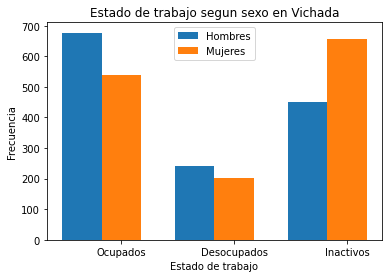

In [ ]:
Hombres = [677, 242, 451]
Mujeres = [538, 203, 658]
 
 
numero_de_grupos = len(Hombres)
indice_barras = np.arange(numero_de_grupos)
ancho_barras = 0.35
 
plt.bar(indice_barras, Hombres, width=ancho_barras, label='Hombres')
plt.bar(indice_barras + ancho_barras, Mujeres, width=ancho_barras, label='Mujeres')
plt.legend(loc='best')

plt.xticks(indice_barras + ancho_barras, ("Ocupados", "Desocupados","Inactivos"))
 
plt.ylabel('Frecuencia')
plt.xlabel('Estado de trabajo')
plt.title('Estado de trabajo segun sexo en Vichada')

¿CUANTOS HOMBRES Y MUJERES ESTAN OCUPADOS LA REGION ORINOQUIA?
Hay 2858 hombres ocupados y 2480 mujeres ocupadas.
Total de ocupados = 5338

In [ ]:
838 + 1343 + 677 #Hombres

2858

In [ ]:
703 + 1239 + 538 #Mujeres

2480

In [ ]:
((2858+2480)/14633)*100

36.47919086995148

El 36.47% de las personas de la region orinoquia estan ocupadas. Donde el 16, 94% son hombres y el 19,53% son mujeres.

In [ ]:
(2480/14633)*100

16.94799425955033

In [ ]:
(2858/14633)*100

19.531196610401146

¿CUANTOS HOMBRES Y MUJERES ESTAN DESOCUPADOS EN LA REGION ORINOQUIA?

Hay 837 hombres desocupados y 734 mujeres desocupadas.
Total de ocupados = 1580

In [ ]:
394 + 201 + 242 #HOMBRES

837

In [ ]:
325 + 206 + 203 #MUJERES

734

In [ ]:
((837+734)/14633)*100 

10.73600765393289

El 10.73% de las personas de la region orinoquia estan desocupadas. Donde el 5,71% son hombres y el 5,01% son mujeres.

In [ ]:
(837/14633)*100

5.719948062598236

In [ ]:
(734/14633)*100

5.016059591334654

¿CUANTOS HOMBRES Y MUJERES ESTAN INACTIVOS EN LA REGION ORINOQUIA?

Hay 1766 hombres inactivos y 2885 mujeres inactivas.
Total de inactivos = 4651

In [ ]:
714 + 451 + 601 #HOMBRES

1766

In [ ]:
1202 + 658 + 1025 #MUJERES

2885

El 31.78% de las personas de la region orinoquia estan INACTIVAS. Donde el 12,06% son hombres y el 19,75% son mujeres.

In [ ]:
((1766+2885)/14633)*100

31.784323105309912

In [ ]:
((1766)/14633)*100 #HOMBRES

12.068612041276566

In [ ]:
((2885)/14633)*100 #MUJERES

19.71571106403335

In [ ]:
36.47919086995148+ 10.73600765393289+ 31.784323105309912

78.99952162919428

In [ ]:
100 - 78.99952162919428 #na

21.000478370805723

# Amazonia

In [ ]:
x = [0,0,0,0,0]
x[0] = Base[Base["DPTO"] == 91].shape[0] # Amazonas
x[1] = Base[Base["DPTO"] == 86].shape[0] # Putumayo
x[2] = Base[Base["DPTO"] == 94].shape[0] # Guainia
x[3] = Base[Base["DPTO"] == 95].shape[0] # Guaviare
x[4] = Base[Base["DPTO"] == 97].shape[0] # Vaupes
x

[4726, 4238, 5187, 4106, 5190]

Text(0, 0.5, 'Frecuencia')

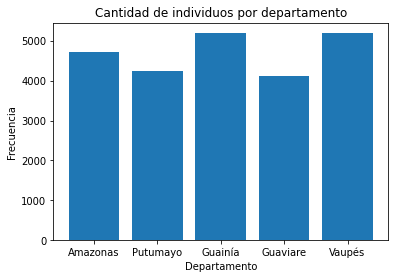

In [ ]:
dep = ["Amazonas", "Putumayo", "Guainía", "Guaviare", "Vaupés"] ; x
plt.bar(dep, x) ; plt.title("Cantidad de individuos por departamento")
plt.xlabel("Departamento") ; plt.ylabel("Frecuencia")

## ¿Cuantas personas hay en cada departamento?

De las personas encuestadas, 4726 son de Amazonas, 4238 de Putumayo, 5187 de Guainía, 4106 de Guavuare y 5190 de Vaupes.

In [ ]:
amazonas = Base[Base["DPTO"] == 91] # Amazonas
putumayo =  Base[Base["DPTO"] == 86] # Putumayo
guania =  Base[Base["DPTO"] == 94]# Guainia
guaviare = Base[Base["DPTO"] == 95]# Guaviare
vaupes = Base[Base["DPTO"] == 97] # Vaupes

In [ ]:
sexo_amazonas = [0,0] ; sexo_amazonas[0], sexo_amazonas[1]  = amazonas[amazonas["P6020"] == 1].shape[0] , amazonas[amazonas["P6020"] == 2].shape[0]
sexo_putumayo = [0,0] ; sexo_putumayo[0], sexo_putumayo[1]  = putumayo[putumayo["P6020"] == 1].shape[0] , putumayo[putumayo["P6020"] == 2].shape[0]
sexo_guania = [0,0] ; sexo_guania[0], sexo_guania[1]  = guania[guania["P6020"] == 1].shape[0] , guania[guania["P6020"] == 2].shape[0]
sexo_guaviare = [0,0] ; sexo_guaviare[0], sexo_guaviare[1]  = guaviare[guaviare["P6020"] == 1].shape[0] , guaviare[guaviare["P6020"] == 2].shape[0]
sexo_vaupes = [0,0] ; sexo_vaupes[0], sexo_vaupes[1]  = vaupes[vaupes["P6020"] == 1].shape[0] , vaupes[vaupes["P6020"] == 2].shape[0]


In [ ]:
Hombres_Amazonia = sexo_amazonas[0] + sexo_putumayo[0] + sexo_guania[0] + sexo_guaviare[0] + sexo_vaupes[0] ; Hombres_Amazonia

11390

In [ ]:
Mujeres_Amazonia = sexo_amazonas[1] + sexo_putumayo[1] + sexo_guania[1] + sexo_guaviare[1] + sexo_vaupes[1] ; Mujeres_Amazonia

12057

Text(0, 0.5, 'Frecuencia')

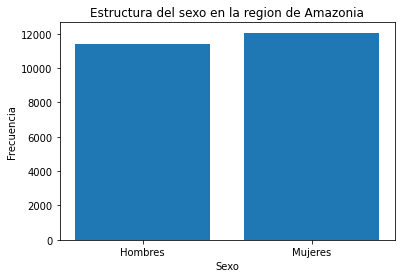

In [ ]:
freq = [Hombres_Amazonia, Mujeres_Amazonia]
dep = ["Hombres","Mujeres"] 
plt.bar(dep, freq) ; plt.title("Estructura del sexo en la region de Amazonia")
plt.xlabel("Sexo") ; plt.ylabel("Frecuencia")

## ¿Cuantos hombres y mujeres hay en la region de Amazonia?

De los encuestados que hacen parte de la region de Amazonia, 11390 son Hombres y 12057 son mujeres.

# Reparticion del sexo en cada departamento

## Amazonas

Text(0, 0.5, 'Frecuencia')

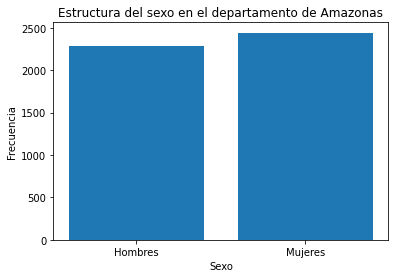

In [ ]:
sexo_amazonas
dep = ["Hombres","Mujeres"] 
plt.bar(dep, sexo_amazonas) ; plt.title("Estructura del sexo en el departamento de Amazonas")
plt.xlabel("Sexo") ; plt.ylabel("Frecuencia")


## Putumayo

Text(0, 0.5, 'Frecuencia')

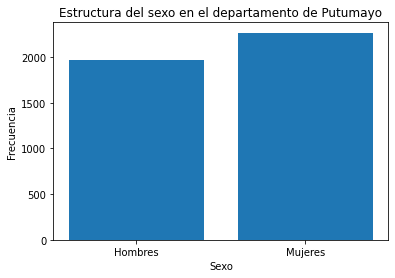

In [ ]:
sexo_putumayo
dep = ["Hombres","Mujeres"] 
plt.bar(dep, sexo_putumayo) ; plt.title("Estructura del sexo en el departamento de Putumayo")
plt.xlabel("Sexo") ; plt.ylabel("Frecuencia")

## Guania

Text(0, 0.5, 'Frecuencia')

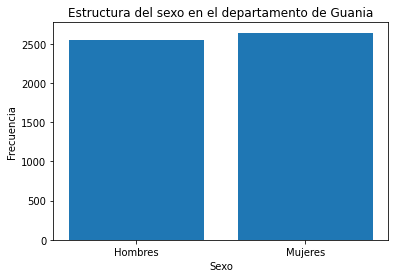

In [ ]:
sexo_guania
plt.bar(dep, sexo_guania ) ; plt.title("Estructura del sexo en el departamento de Guania")
plt.xlabel("Sexo") ; plt.ylabel("Frecuencia")

## Guaviare

Text(0, 0.5, 'Frecuencia')

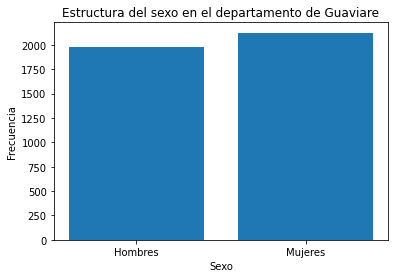

In [ ]:
sexo_guaviare
plt.bar(dep, sexo_guaviare ) ; plt.title("Estructura del sexo en el departamento de Guaviare")
plt.xlabel("Sexo") ; plt.ylabel("Frecuencia")

## Vaupes

Text(0, 0.5, 'Frecuencia')

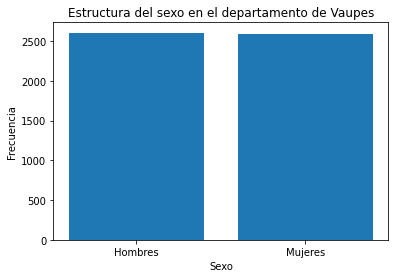

In [ ]:
sexo_vaupes
plt.bar(dep, sexo_vaupes) ; plt.title("Estructura del sexo en el departamento de Vaupes")
plt.xlabel("Sexo") ; plt.ylabel("Frecuencia")

In [ ]:
sexo_vaupes

[2606, 2584]

De los encuestados, los que hacen parte del departamento de amazonas 2284 son hombres y 2442 son mujeres, en cuanto a los del departamento de putumayo 1972 son hombres y 2266 son mujeres, entre otros, en el departamento de vaupes hay 2606 hombres y 2584 mujeres.

# ESTADO

In [ ]:
estado_amazonas = [0,0,0]
estado_amazonas = amazonas[amazonas["Estado"] == "Ocupados" ].shape[0] ,amazonas[amazonas["Estado"] == "Desocupados" ].shape[0], amazonas[amazonas["Estado"] == "Inactivos" ].shape[0]


In [ ]:
estado_amazonas

(1740, 0, 1714)

In [ ]:
estado_putumayo = [0,0,0]
estado_putumayo = putumayo[putumayo["Estado"] == "Ocupados" ].shape[0] , putumayo[putumayo["Estado"] == "Desocupados" ].shape[0], putumayo[putumayo["Estado"] == "Inactivos" ].shape[0]
estado_putumayo

(1368, 0, 1526)

In [ ]:
estado_guiania = [0,0,0]
estado_guania = guania[guania["Estado"] == "Ocupados" ].shape[0] , guania[guania["Estado"] == "Desocupados" ].shape[0], guania[guania["Estado"] == "Inactivos" ].shape[0]
estado_guania

(1740, 0, 1898)

In [ ]:
estado_guaviare = [0,0,0]
estado_guaviare = guaviare[guaviare["Estado"] == "Ocupados" ].shape[0] , guaviare[guaviare["Estado"] == "Desocupados" ].shape[0], guaviare[guaviare["Estado"] == "Inactivos" ].shape[0]
estado_guaviare

(1982, 0, 864)

In [ ]:
estado_vaupes = [0,0,0]
estado_vaupes = vaupes[vaupes["Estado"] == "Ocupados" ].shape[0] , vaupes[vaupes["Estado"] == "Desocupados" ].shape[0], vaupes[vaupes["Estado"] == "Inactivos" ].shape[0]
estado_vaupes

(1951, 0, 1732)

In [ ]:
estado_vaupes 

(1951, 0, 1732)

De las personas encuentadas, En el departamento de vaupes tenemos 1951 ocupados y 1732 inactivos, en el departamento de guaviare hay 1982 ocupados y 864 inactivos, entre otros departamentos en la amazonas tenemos 1740 ocupados y 1714 inactivos.

## Descripción pasos
**1.**

•	Se agregaron las bases de datos ocupados, desocupados, inactivos, fuerza de trabajo y características generales a colab, luego se llamaron por medio de ´pd.read_excel´ y se les asigno un nombre relacionado a cada base.

•	Conociendo la descripción tanto de la base como de las variables, se decidió eliminar las siguientes variables en las 5 bases:

o	`FEX_C` o factor de expansión, usado para las estimaciones. 

o	`AREA` o área, la cual tenía similitud con la variable `departamento`.

o	`RGIS` o registro el cual hace referencia al tipo de encuesta.

•	En las bases de datos ocupados, desocupados, inactivos y fuerza de trabajo se encuentran las variables `OCI`, `DSI`, `INI` y `FT` respectivamente.  Estas variables identifican a cada individuo como parte de la base en la que se encuentran. Dichas variables también fueron eliminadas de su respectiva base.

•	De la base fuerza de trabajo se eliminaron las siguientes variables:

o	P6240S1:

o	P6310S1:

o	P6290S1:
            
Puesto que no se consideraban necesarias en el ejercicio a realizar. Cabe resaltar que en la encuesta las variables anteriormente mencionadas hacen referencia a preguntas abiertas.


•	En las bases ocupados, desocupados, inactivos se creó una nueva variable llamada Estado´ con el fin de identificar la situación en términos laborales de cada individuo al finalizar la concatenación de la información trabajada.


•	Se eliminaron los individuos duplicados de cada base. 


•	Se determinó las dimensiones de cada base para tener idea de la dimensión de la base final a trabajar.


•	Se concatenaron por individuos (filas), las bases ocupados, desocupados e inactivos, esta concatenación se nombró dt2. 


•	Usando el comando merge, se unió la base características generales y fuerza de trabajo, usando como llave identificadora de individuos las variables `DIRECTORIO`, `SECUENCIA_P`, `ORDEN`, `HOGAR`, `DPTO`. De esta forma se organiza la base dt1, donde a los individuos que pertenecen a la fuerza laboral, se les añadió sus características demográficas. 

•	 Puesto que dt1 y dt2 identifican a cada individuo con las variables `DIRECTORIO`, `SECUENCIA_P`, `ORDEN`, `HOGAR`, `DPTO`. Se creó un merge nombrado Base, en el cual cada individuo encuestado relaciona su información general con las respuestas de cada base de datos. 

**2.**

a. Para encontrar los sexos dentro de la base de datos utilizada se hicieron los siguientes pasos:

1.	Para determinar el sexo masculino se utilizó el comando (.loc) para la base de datos original seleccionado así todas las filas y una única columna (`P6020`) que significa el sexo. La variable sexo puede tomar dos valores: (1) Hombre (2) Mujer. Por lo tanto, para encontrar el sexo masculino se igualó al valor 1. 
2.	El paso anterior nos arroja dos columnas. La primera es el identificador y la segunda arroja un dtype = bool indicando True = 1 (Hombres) o False = 0 (Mujeres). 
3.	Se selecciono esta base arrojada y con ayuda del comando (.loc) le decimos a Python que tome o extraiga aquellos valores igual a 1 para la variable P6020 tomando todas las características de la base original.
4.	Este mismo procedimiento se hizo para las mujeres con la única diferencia que el valor igualado en (.loc) es 2 indicando el sexo femenino. 

b. Para encontrar los departamentos de Orinoquia dentro de la base de datos utilizada se hicieron los siguientes pasos:

1.	Con ayuda del comando (.loc) para la base de datos original se seleccionó todas las filas y una única columna (`DPTO`) que significa departamento. Sabemos que los departamentos de la región Orinoquia son: Arauca, Casanare, Vichada con unos números respectivos para su identificación 81, 85, 99.
2.	La variable `DPTO` puede tomar dos valores: (81) Arauca (85) Casanare y (99). Por lo tanto, para encontrar el departamento de Arauca se igualó al valor 81 y luego se ajusto a la base de datos con el mismo comando (.loc) como se realizo anteriormente con la variable sexo.
3.	Para encontrar aquellas personas que pertenecen al departamento de Casanare y Arauca se tomo el procedimiento anterior y se igualaron a los valores 85 y 99.

Para encontrar cuantos hombres y mujeres hay en el departamento de Arauca, Casanare y Vichada se usó el siguiente procedimiento: 

1.	De la base Masculino creada en el punto (a) se seleccionaron las columnas [4,6] las cuales corresponden a la variable sexo y departamento danto origen a la base A. Luego de ello con ayuda del comando (.loc) para esta nueva base creada le pedimos a Python que tome para la variable departamento aquellos iguales al 81. Finalmente se aplico a la base A y se obtuvo la cantidad de hombres en Arauca. Por complemento se consiguió la cantidad de mujeres que están en este departamento. 
2.	Este mismo procedimiento se hizo para los departamentos Casanare y Vichada. La diferencia es el numero de la variable `DPTO` que se tomó, en este caso corresponde a los números 85 y 99 respectivamente.

Para hallar cuantos hombres y mujeres hay en Orinoquia se realizó
:
1.	Para encontrar el total de hombres en la región Orinoquia se sumaron los varones pertenecientes a Arauca, Casanare y Vichada encontrados los pasos anteriores.
2.	Para encontrar el total de mujeres en la región Orinoquia se sumaron las mujeres pertenecientes a Arauca, Casanare y Vichada encontrados los pasos anteriores.

*Así como en la región orinoquia, se realizaron los calculos para la región amazonia.*




